In [41]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd

In [42]:
fs, station2 = wavfile.read('altas.wav')
fs, station1 = wavfile.read('baixas.wav')

#Vamos garantir que os dois sinais possuem o mesmo número de amostras

station2 = station2[:100000]
station1 = station1[:100000]

In [43]:
ipd.Audio(station1, rate=fs)

In [44]:
ipd.Audio(station2, rate=fs)

In [45]:
def plot(x, y, xlabel, ylabel, width=14, height=6, show=True, save=None, xlim=False):
    fig, ax = plt.subplots(figsize=(width, height))
    ax.plot(x, y)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    ax.grid(True)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    fig.tight_layout()

    if isinstance(save, str):
        fig.savefig(save)
    if xlim:
        plt.xlim((1,1.005))

    if show:
        fig.show()

    return fig, ax

In [46]:
def plot_espectro_Hz(y, Fs, width=14, height=6, show=True, save=None, n_xticks=7):
    """ Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto em função de Hz"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # pegando so as frequencias positivas
    fft_y = fft_y[:fft_y.size//2]
    
    # frequencias avaliadas (Hz)
    f = np.linspace(0, Fs/2, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # exibe o grafico do espectro
    fig, ax = plot(f, fft_y_norm, 'Frequência $[kHz]$', '|$Y(f)$|', show=False, save=save)
    ticks = np.linspace(0, Fs//2, n_xticks)
    plt.xticks(
        ticks=ticks,
        labels=[f'{tick/1000:.2f}' for tick in ticks],
        fontsize=16
    )

    if show:
        fig.show()

    return fig, ax

<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

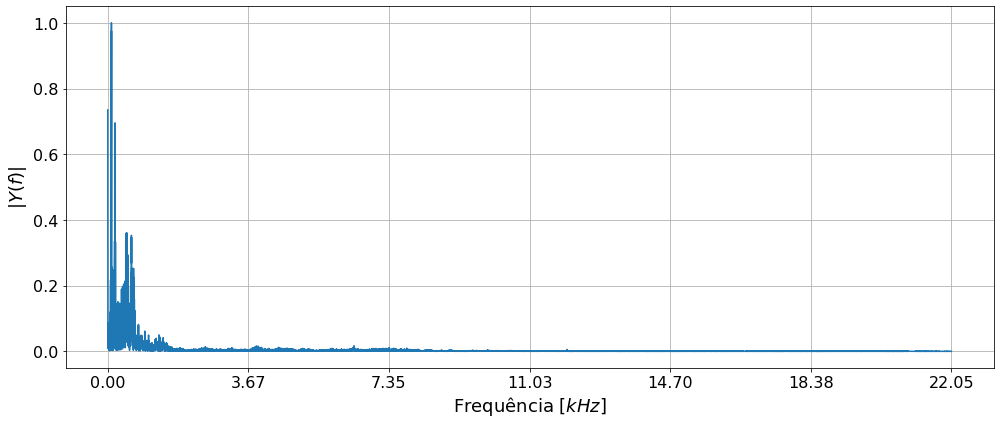

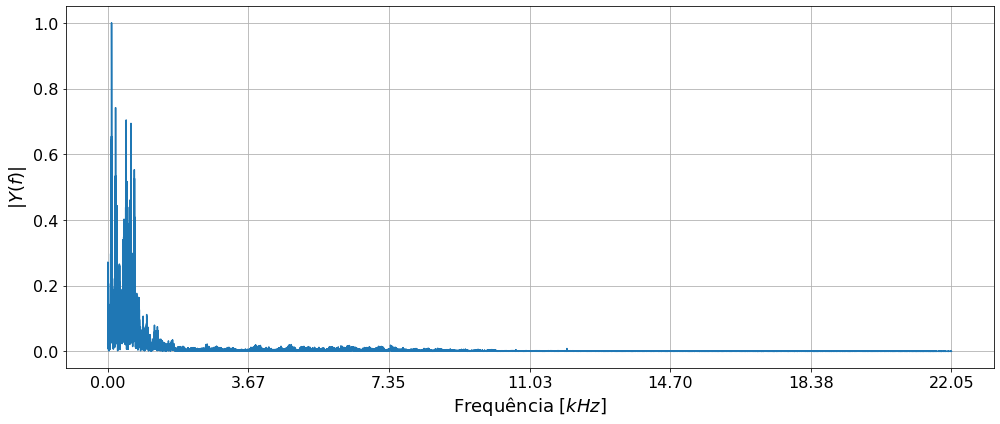

In [47]:
plot_espectro_Hz(station1, fs, save="ff_baixas")
plot_espectro_Hz(station2, fs, save= "ff_altas")

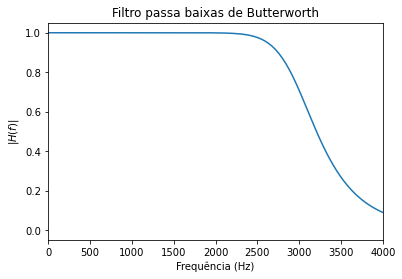

In [48]:
#Projeta o filtro
sos = signal.butter(8, 3000, 'low', fs = fs, output = 'sos')

#Plota a resposta em frequência do filtro
w,h = signal.sosfreqz(sos,fs = fs)
plt.plot(w,np.abs(h));
plt.xlim((0,4000))
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa baixas de Butterworth');

#Filtra os sinais usando o filtro projetado acima
station2_f = signal.sosfilt(sos,station2)
station1_f = signal.sosfilt(sos,station1)

<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

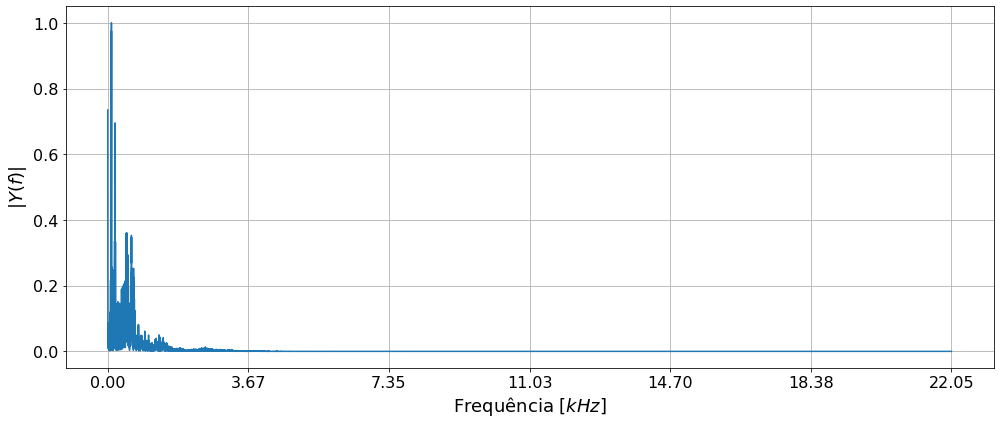

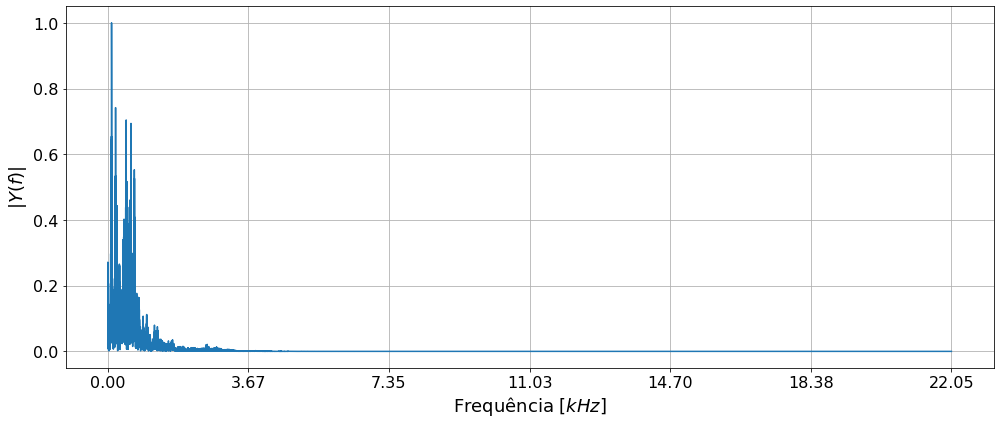

In [49]:
plot_espectro_Hz(station1_f, fs, save= "ff_baixas_f")
plot_espectro_Hz(station2_f, fs, save= "ff_altas_f")

In [50]:
ipd.Audio(station1_f, rate=fs)

In [51]:
ipd.Audio(station2_f, rate=fs)

In [52]:
t = np.linspace(0, station1.size/fs, station1.size)
carrier = np.cos(2*np.pi*8000*t)

In [53]:
station2_modulated = carrier*station2_f

In [54]:
ipd.Audio(station2_modulated, rate=fs)

<ipython-input-45-a6f388ad21bf>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

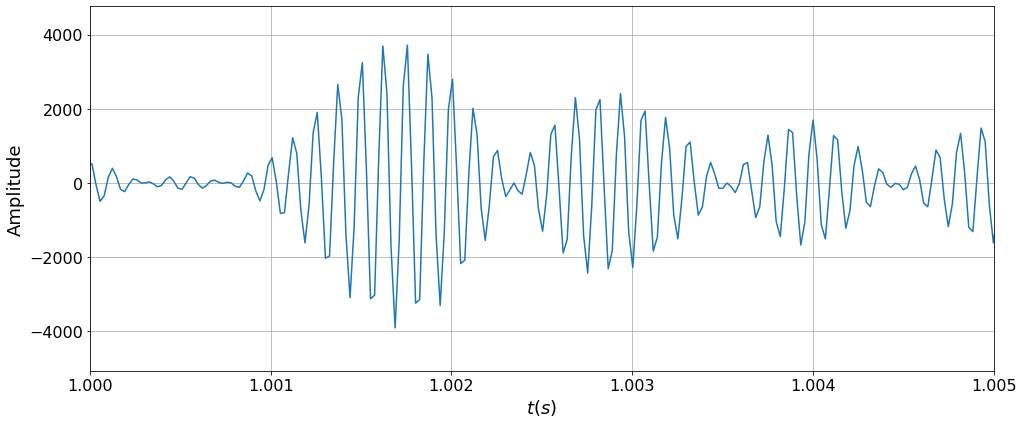

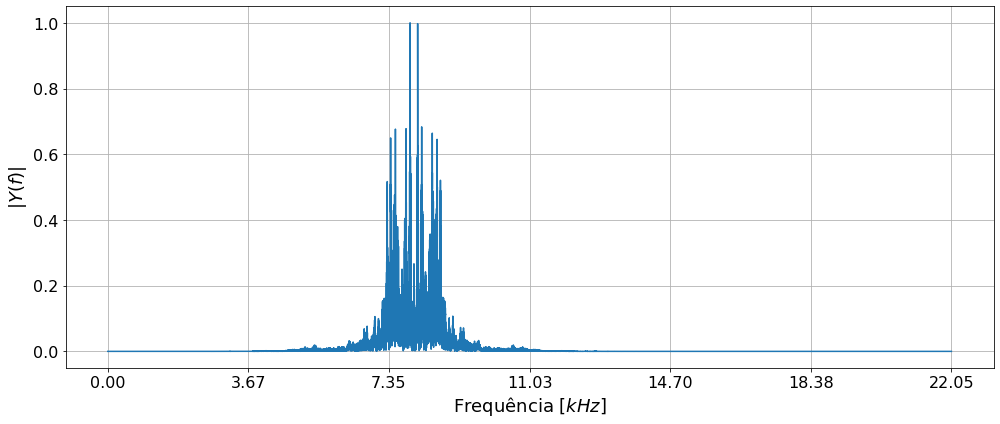

In [55]:
plot(t, station2_modulated, '$t (s)$', 'Amplitude', xlim=True)
plot_espectro_Hz(station2_modulated, fs)

In [56]:
station1_f_fft = np.fft.fft(station1_f)
station2_modulated_fft = np.fft.fft(station2_modulated)
signal_sum_fft = station1_f_fft + station2_modulated_fft
signal_sum = np.real(np.fft.ifft(signal_sum_fft))

<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

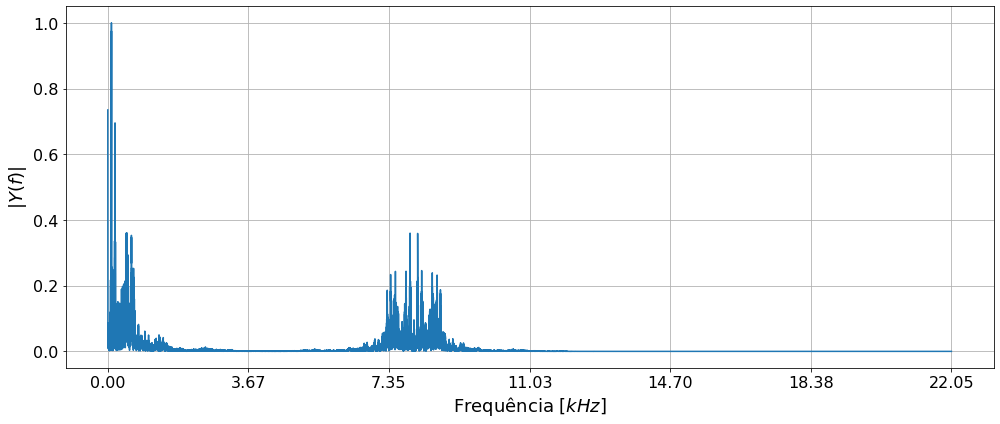

In [57]:
plot_espectro_Hz(signal_sum, fs,save="espc_rx")

In [58]:
ipd.Audio(signal_sum, rate=fs)

In [59]:
fs, rx = wavfile.read('rx.wav')

In [60]:
ipd.Audio(rx, rate=fs)

In [61]:
# removendo componentes da segunda estação do espectro
sos1 = signal.butter(8, 4000, 'low', fs = fs, output = 'sos')
station1_obtained = signal.sosfilt(sos1, signal_sum)

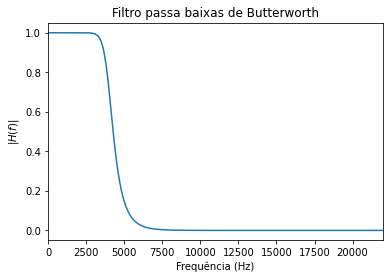

In [62]:
w,h = signal.sosfreqz(sos1,fs = fs)
plt.plot(w,np.abs(h));
plt.xlim((0, 22000))
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa baixas de Butterworth');

<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

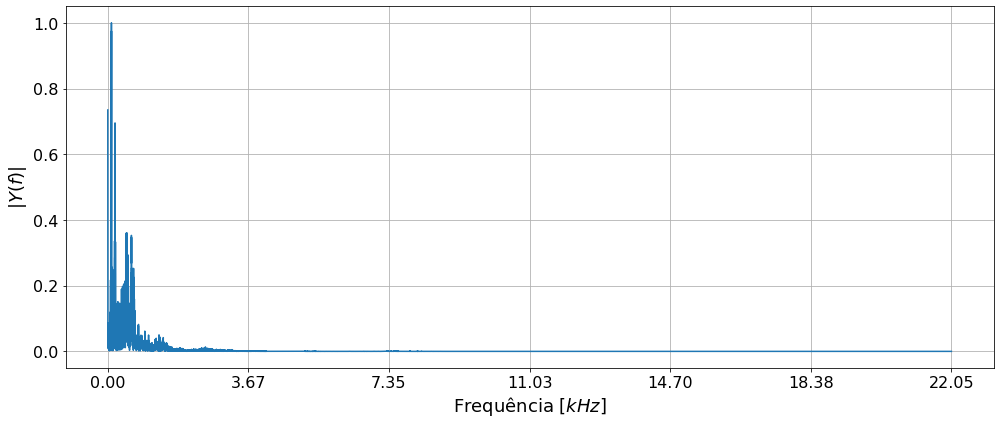

In [63]:
plot_espectro_Hz(station1_obtained, fs, save="st1_recovered")

In [64]:
ipd.Audio(station1_obtained, rate=fs)

In [65]:
# removendo componentes da primeira estação do espectro
sos2 = signal.butter(8, [4000, 12000], 'bandpass', fs = fs, output = 'sos')
station2_obtained_modulated = signal.sosfilt(sos2, signal_sum)

# removendo resíduos da modulação
station2_obtained_modulated_twice = carrier*station2_obtained_modulated
station2_obtained_final = signal.sosfilt(sos1, station2_obtained_modulated_twice)

<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-46-2c7285c5b941>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1008x432 with 1 Axes>,
 <AxesSubplot:xlabel='Frequência $[kHz]$', ylabel='|$Y(f)$|'>)

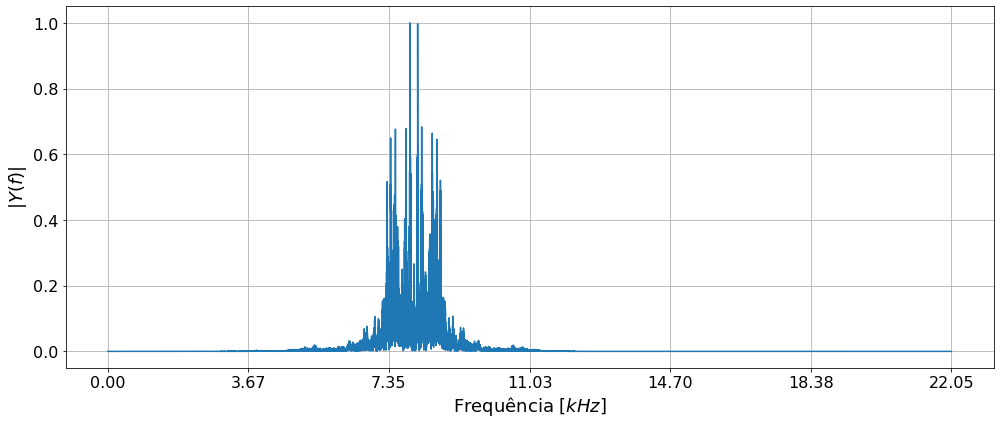

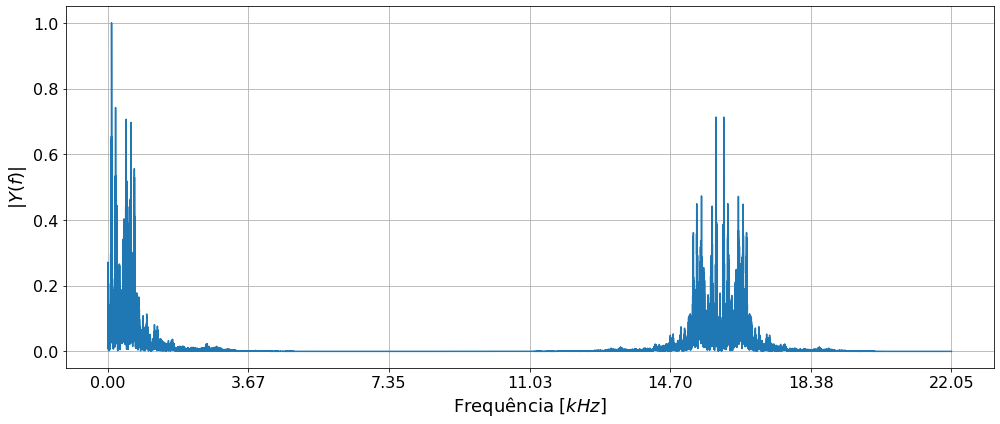

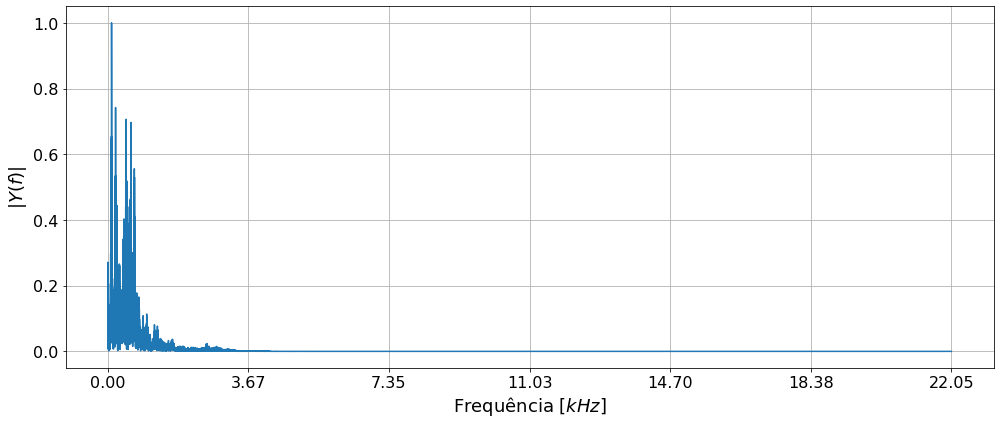

In [66]:
plot_espectro_Hz(station2_obtained_modulated, fs, save="st2_recovered_pt1")
plot_espectro_Hz(station2_obtained_modulated_twice, fs, save="st2_recovered_pt2")
plot_espectro_Hz(station2_obtained_final, fs, save="st2_recovered_pt3_final")

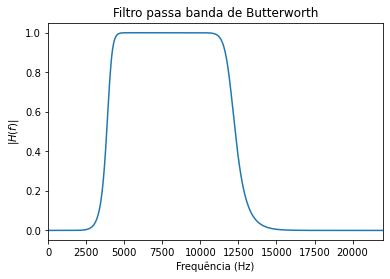

In [67]:
w,h = signal.sosfreqz(sos2,fs = fs)
plt.plot(w,np.abs(h));
plt.xlim((0, 22000))
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa banda de Butterworth');
plt.savefig("f_p_b")

In [68]:
ipd.Audio(station2_obtained_final, rate=fs)